In [1]:
# Imports

import pandas as pd
import altair as alt
from vega_datasets import data
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [26]:
df = pd.read_csv('CVE22batch1.csv', encoding='ISO-8859-1')

In [27]:
# Filter on matches above a certain threshold, drop missing column, round results to 4 decimals

df_mask=df['matched_score']>0.001
filtered_df = df[df_mask]
filtered_df.drop('missing',axis=1, inplace=True)
filtered_df = filtered_df.round(4)

C:\Users\gibso\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
# Generate bar chart

source = filtered_df
bars = alt.Chart(source, title="KSAs Best Aligned to CVE Database 2022").mark_bar().encode(
    x=alt.X('matched_score:Q'),
    y=alt.Y('ksa:O', sort='-x', axis=alt.Axis(labelLimit=500, titleAngle=0, titleAlign='left', titleY=-5, titleX=-60)
))

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=10
).encode(
    text='matched_score:Q'
)

(bars + text).properties(height=300)

alt.LayerChart(...)

In [29]:
# Read dataset

cve = pd.read_csv('CVE DB_cleaned.csv', encoding='ISO-8859-1')
cve

,CVE_Number,Date,Description
0,CVE-1999-0001,1/1/99 0:00,ip_input.c in BSD-derived TCP/IP implementatio...
1,CVE-1999-0002,1/1/99 0:00,Buffer overflow in NFS mountd gives root acces...
2,CVE-1999-0003,1/1/99 0:00,Execute commands as root via buffer overflow i...
3,CVE-1999-0004,1/1/99 0:00,"MIME buffer overflow in email clients, e.g. So..."
4,CVE-1999-0005,1/1/99 0:00,Arbitrary command execution via IMAP buffer ov...
...,...,...,...
169673,CVE-2022-24668,1/1/22 0:00,A program using swift-nio-http2 is vulnerable ...
169674,CVE-2022-24676,1/1/22 0:00,update_code in Admin.php in HYBBS2 through 2.3...
169675,CVE-2022-24677,1/1/22 0:00,Admin.php in HYBBS2 through 2.3.2 allows remot...
169676,CVE-2022-24682,1/1/22 0:00,An issue was discovered in the Calendar featur...


In [30]:
# Filter as needed/wanted

cve1 = cve.loc[cve['Date'] == '1/1/11 0:00']
cve1

,CVE_Number,Date,Description
45823,CVE-2011-0001,1/1/11 0:00,Double free vulnerability in the iscsi_rx_hand...
45824,CVE-2011-0002,1/1/11 0:00,libuser before 0.57 uses a cleartext password ...
45825,CVE-2011-0003,1/1/11 0:00,"MediaWiki before 1.16.1, when user or site Jav..."
45826,CVE-2011-0004,1/1/11 0:00,Multiple cross-site scripting (XSS) vulnerabil...
45827,CVE-2011-0005,1/1/11 0:00,Cross-site scripting (XSS) vulnerability in th...
...,...,...,...
50418,CVE-2011-5327,1/1/11 0:00,"In the Linux kernel before 3.1, an off by one ..."
50419,CVE-2011-5328,1/1/11 0:00,The user-access-manager plugin before 1.2 for ...
50420,CVE-2011-5329,1/1/11 0:00,The redirection plugin before 2.2.9 for WordPr...
50421,CVE-2011-5330,1/1/11 0:00,Distributed Ruby (aka DRuby) 1.8 mishandles th...


In [31]:
# Remove stop words

text = cve1['Description'].values
text = ' '.join(text)
stopwords = set(STOPWORDS)

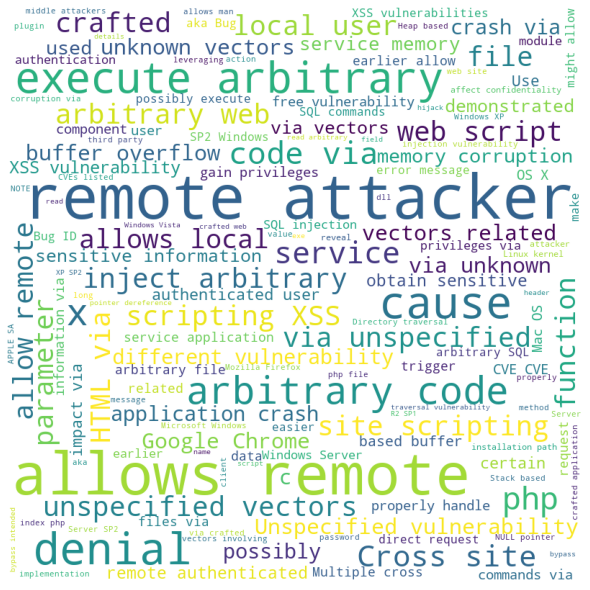

In [32]:
# Generate word cloud

word_cloud = WordCloud(width = 800, height = 800,
                       background_color = 'white',
                       stopwords = stopwords,
                       min_font_size = 10) .generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()